In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data Upload

In [3]:
customers = pd.read_csv("/content/drive/MyDrive/Data Science/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Data Science/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Data Science/Transactions.csv")

#Exploartory Data Analysis

In [4]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [15]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


#Total revenue per customer

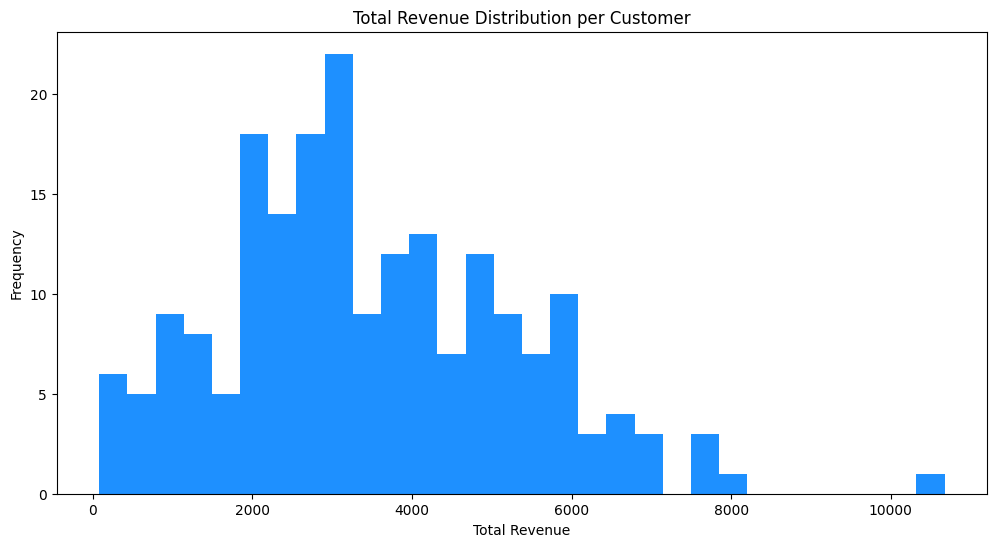

In [13]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
customer_revenue.plot(kind='hist', bins=30, color='dodgerblue', figsize=(12,6))
plt.title('Total Revenue Distribution per Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

#Revenue by Product Type

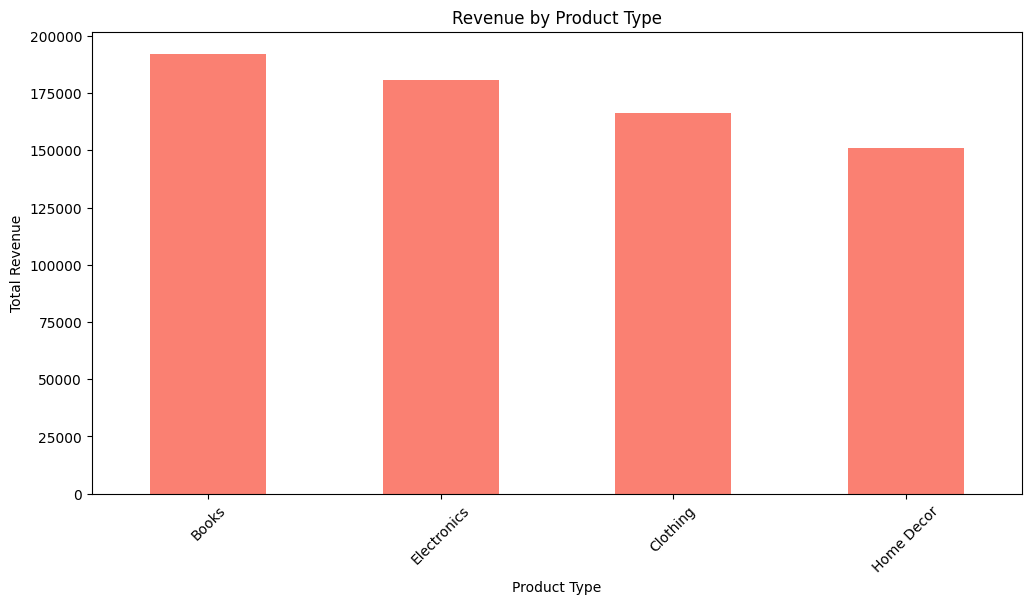

In [16]:
product_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar', color='salmon', figsize=(12,6))
plt.title('Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#Monthly sales trends

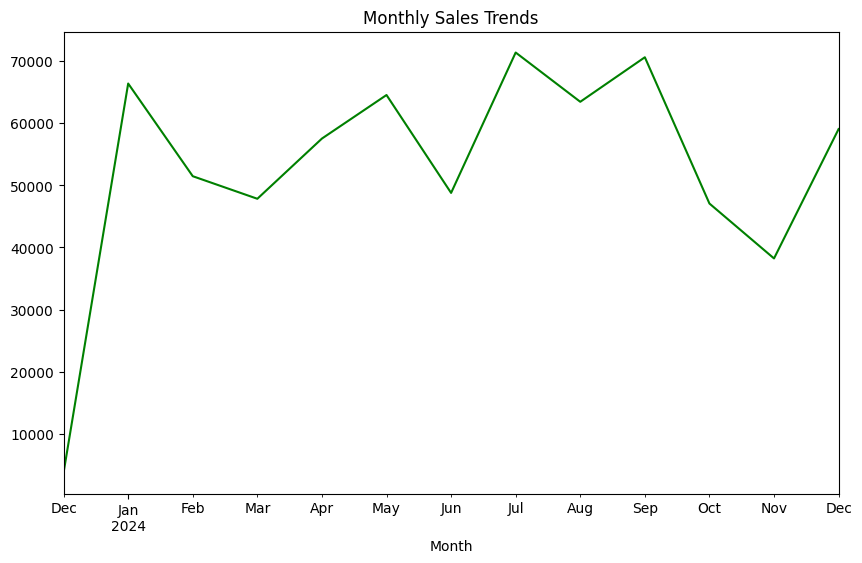

In [9]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(color='green')
plt.title("Monthly Sales Trends")
plt.show()

#Customer frequency by region

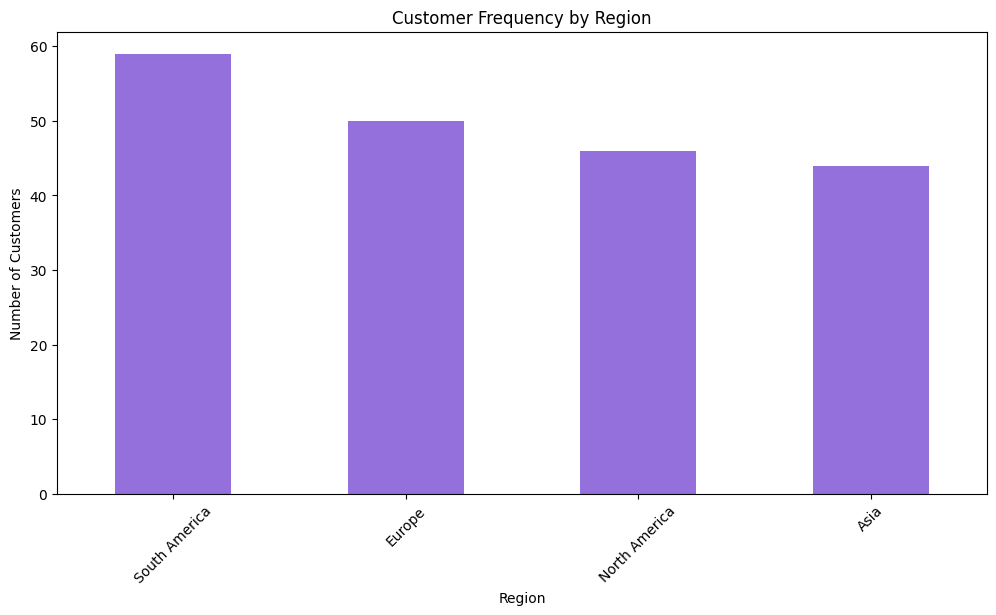

In [17]:
customer_frequency = merged_data.groupby('Region')['CustomerID'].nunique().sort_values(ascending=False)
customer_frequency.plot(kind='bar', color='mediumpurple', figsize=(12,6))
plt.title('Customer Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

#Total Spend vc Transaction frequency

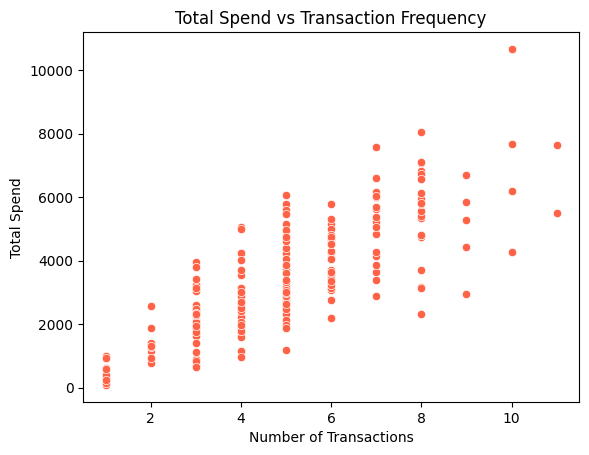

In [18]:
customer_transaction_count = merged_data.groupby('CustomerID').size()
total_spend_per_customer = merged_data.groupby('CustomerID')['TotalValue'].sum()
customer_transaction_freq = pd.DataFrame({
    'TotalSpend': total_spend_per_customer,
    'TransactionCount': customer_transaction_count
})

sns.scatterplot(x='TransactionCount', y='TotalSpend', data=customer_transaction_freq, color='tomato')
plt.title('Total Spend vs Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Spend')
plt.show()

#Repeated customer analysis

In [19]:
repeat_customers = merged_data.groupby('CustomerID').size()
repeat_customer_count = repeat_customers[repeat_customers > 1].count()
total_customers = customers['CustomerID'].nunique()
repeat_customer_percentage = (repeat_customer_count / total_customers) * 100
print(f"Percentage of Repeat Customers: {repeat_customer_percentage:.2f}%")

Percentage of Repeat Customers: 93.50%
